In [6]:
#! pip install pandas-datareader
#! pip install pmdarima
#! pip install plotly

from pandas_datareader import DataReader # pip install pandas-datareader
from pandas_datareader import data
from datetime import datetime
from pmdarima.arima import *
from pmdarima import preprocessing

from statsmodels.tsa.seasonal import seasonal_decompose

import pandas as pd
import pmdarima as pm
import plotly as ply
 
start = pd.to_datetime('2010-01-01') # in YYYY-MM-DD format
end = pd.to_datetime('2018-01-01')
ts = data.DataReader('NDAQ', 'yahoo', start , end) # here 'yahoo' is the API to yahoo

<AxesSubplot:title={'center':'NDAQ 2010-2021'}, xlabel='Date'>

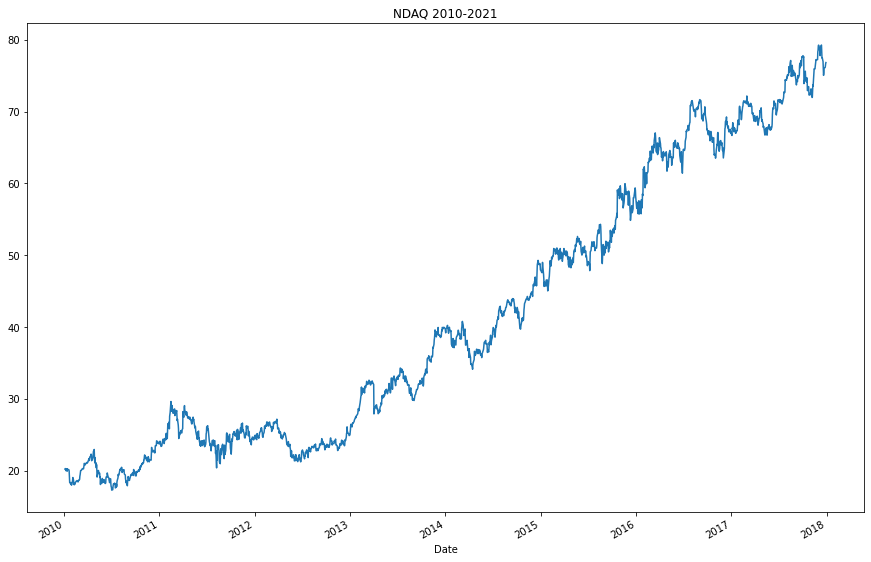

In [7]:
ts.Close.plot(figsize=(15,10), title = "NDAQ 2010-2021")

/Users/oisintong/opt/anaconda3/lib/python3.8/site-packages/pmdarima/utils/visualization.py:219: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


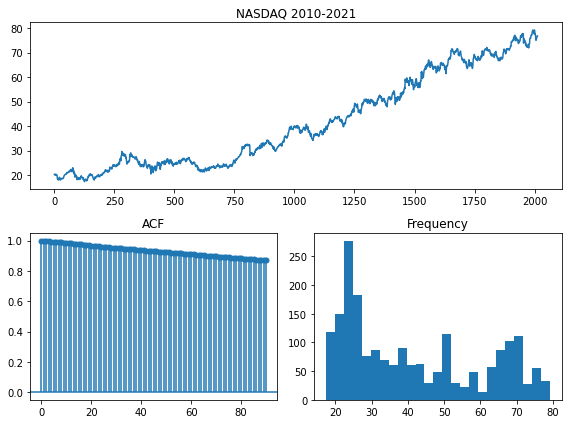

In [8]:
pm.tsdisplay(
    ts.Close, lag_max=90, title="NASDAQ 2010-2021", show=True)

/Users/oisintong/opt/anaconda3/lib/python3.8/site-packages/pmdarima/utils/visualization.py:219: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


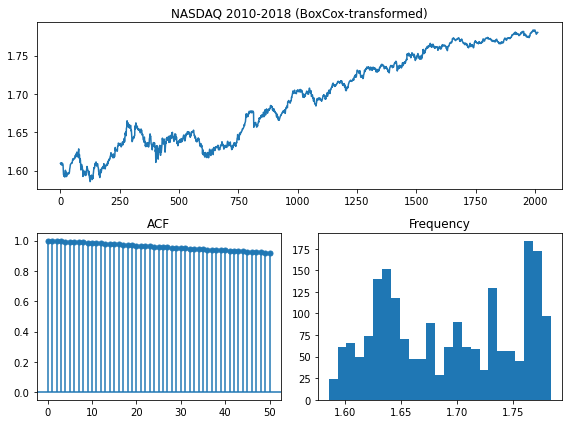

In [9]:
ts_normal,_ = preprocessing.BoxCoxEndogTransformer(lmbda=-0.5,lmbda2=6).fit_transform(ts.Close)
pm.tsdisplay(
    ts_normal, lag_max=50, title="NASDAQ 2010-2018 (BoxCox-transformed)", show=True)


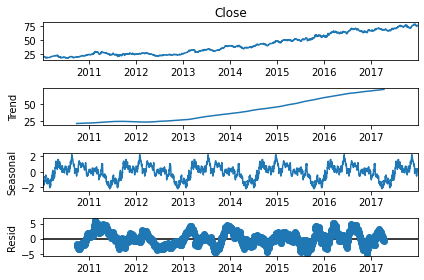

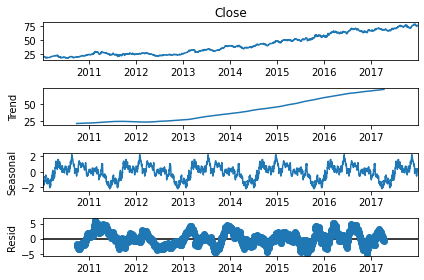

In [10]:
decomp_results = seasonal_decompose(ts.Close, period= 365)

decomp_results.plot() 

In [11]:
print (decomp_results)

In [12]:
ts_diff = ts.diff()
ts_diff.Close[0] = 0

<AxesSubplot:title={'center':'NDAQ Diff 2010-2021'}, xlabel='Date'>

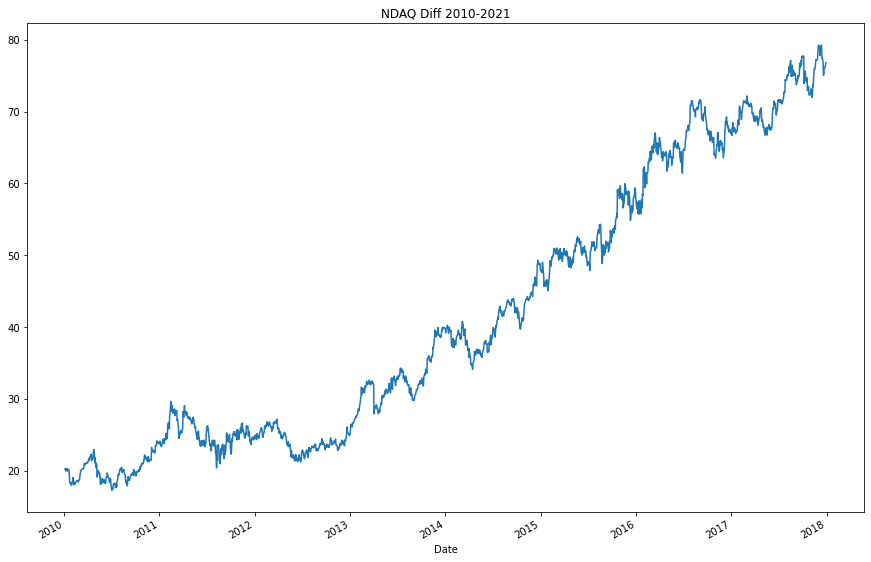

In [13]:
ts.Close.plot(figsize=(15,10), title = "NDAQ Diff 2010-2021")

In [14]:
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(ts.Close)

(0.39176976049000023, True)

/Users/oisintong/opt/anaconda3/lib/python3.8/site-packages/pmdarima/utils/visualization.py:219: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


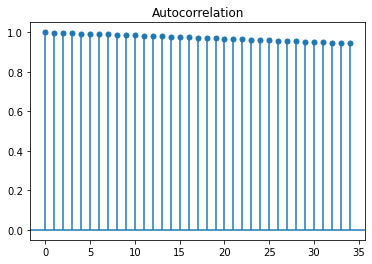

In [15]:
pm.plot_acf(ts.Close)

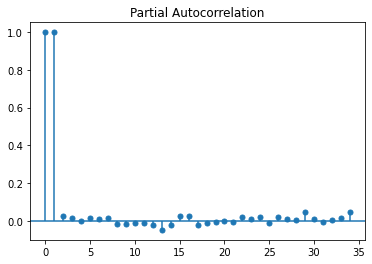

In [16]:
pm.plot_pacf(ts.Close)

In [17]:
stepwise_model_12 = auto_arima(ts.Close, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
stepwise_model_7 = auto_arima(ts.Close, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model_12.aic())
print(stepwise_model_7.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=4.13 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4718.993, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4159.076, Time=0.46 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=3.40 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=4707.145, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=3923.013, Time=1.17 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=24.77 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=4.14 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=3934.017, Time=0.92 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=3924.900, Time=1.26 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=3924.874, Time=1.41 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=3922.886, Time=1.15 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=4159.218, Time=0.43 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=18.88 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC

In [18]:
train = ts.Close.loc['2010-01-01':'2018-01-01']
test_7 = ts.Close.loc['2017-12-20': '2018-01-01']
test_31 = ts.Close.loc['2017-11-15':'2018-01-01']

two_month = ts.Close.loc['2017-10-15':'2018-01-01']

In [19]:
stepwise_model_7.fit(train)
stepwise_model_12.fit(train)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [20]:
print (test_7.size)
print (test_31.size)
print (train.size)

7
31
2013


In [21]:
future_forecast_7 = stepwise_model_7.predict(n_periods=31)
future_forecast_12 = stepwise_model_12.predict(n_periods=31)

In [22]:
future_forecast_7 = pd.DataFrame(future_forecast_7,index = test_7.index,columns=['Prediction'])

plot_7 = pd.concat([test_31,future_forecast_7],axis=1).plot(figsize = (15,10))

ValueError: Shape of passed values is (31, 1), indices imply (7, 1)

In [ ]:
future_forecast_12 = pd.DataFrame(future_forecast_12,index = test_31.index,columns=['Prediction'])

plot_31 = pd.concat([test_31,future_forecast_12],axis=1).plot(figsize = (15,10))

In [ ]:
plot_31_long = pd.concat([two_month,future_forecast_12],axis=1).plot(figsize = (15,10))

In [71]:
def testLevelStationarity(ts):
    print("KPSS: " + str(ndiffs(ts, alpha=0.05)))
    print("ADF: " + str(ndiffs(ts, test='adf')))
    print("PP: " + str(ndiffs(ts, test='pp')))

In [72]:
testLevelStationarity(ts.Close)

KPSS: 1
ADF: 1
PP: 1
